# Data Analysis

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Placement_Data.csv')

**Check the first four rows of the dataframe**

In [ ]:
df.head(4)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN


1.sl_no : Serial Number,

2.ssc_p : Secondary Education percentage- 10th Grade

3.ssc_b : Board of Education- Central/ Others

4.hsc_p : Higher Secondary Education percentage- 12th Grade

5.hsc_b : Board of Education- Central/ Others

6.hsc_s : Specialization in Higher Secondary Education

7.degree_p : Degree Percentage

8.degree_t : Under Graduation(Degree type)- Field of degree education

9.workex : Work Experience

10.etest_p : Employability test percentage ( conducted by college)

11.specialisation : Post Graduation(MBA)- Specialization

12.mba_p : MBA percentage

13.status : Status of placement- Placed/Not placed

14.salary : Salary if the student is placed

**Get all feature names**

In [ ]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

**Find the number of records and columns**

In [ ]:
df.shape

(215, 15)

**Use the .info() method to find the number of Non Null entries and Data Type of each feature**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


**What is the average Secondary Education percentage - 10th Grade**

In [ ]:
df['ssc_p'].mean()

67.30339534883721

**What is the max Secondary Education percentage - 10th Grade**

In [ ]:
df['ssc_p'].max()

89.4

**How many toppers where there in 10th Grade?**


In [ ]:
df[df['ssc_p']==df['ssc_p'].max()].shape[0]

1

**Is the student who got highest Secondary Eduaction percentage, placed or not?**


In [ ]:
df[df['ssc_p']==df['ssc_p'].max()]['status']

145    Placed
Name: status, dtype: object

**How many students are placed or unplaced?**

In [ ]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [ ]:
148/215

0.6883720930232559

**What is the most common degree of the placed students?**

In [ ]:
df[df['status']=='Placed']['degree_t'].value_counts().head(1)

Comm&Mgmt    102
Name: degree_t, dtype: int64


**How many unique degrees are there in the dataset?**

In [ ]:
df['degree_t'].nunique()

3

**Is there a correlation between 10th and 12th percentage**

In [ ]:
df[['ssc_p','hsc_p']].corr()

,ssc_p,hsc_p
ssc_p,1.000000,0.511472
hsc_p,0.511472,1.000000


**Find the correlation matrix**?


In [ ]:
df.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


# Data Pre-processing

**Identify the column which can be removed?(only 1)**

**Remove the unnecessary column**

In [ ]:
df.drop(columns=['sl_no'], inplace=True)

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


When inplace = True , the data is modified in place, which means it will return nothing and the dataframe is now updated. When inplace = False , which is the default, then the operation is performed and it returns a copy of the object.

**Check number of null values in each column**

In [ ]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

**Fill the missing values with appropriate values and check number of null values in each column again**

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# Data Visualization

**Import matplotlib and seaborn**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**Draw a scatter plot between 10th and 12th percentage with labels and title**

Text(0.5, 1.0, 'Scatter plot between 10th and 12th percentage')

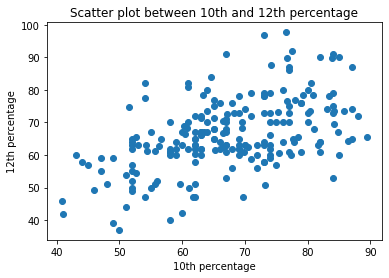

In [ ]:
plt.scatter(df['ssc_p'],df['hsc_p'])
plt.xlabel("10th percentage")
plt.ylabel("12th percentage")
plt.title("Scatter plot between 10th and 12th percentage")

**Draw the scatter plot between 10th and 12th class percentage of students grouped based on placement data**

In [ ]:
colors={'Placed':'tab:green','Not Placed':'tab:red'}
df['status'].map(colors)

0      tab:green
1      tab:green
2      tab:green
3        tab:red
4      tab:green
         ...    
210    tab:green
211    tab:green
212    tab:green
213    tab:green
214      tab:red
Name: status, Length: 215, dtype: object

Text(0.5, 1.0, 'Scatter plot between 10th and 12th percentage')

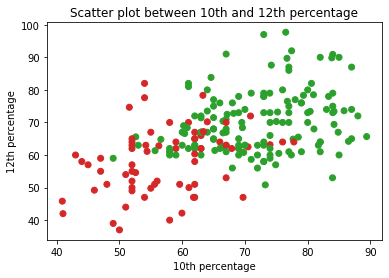

In [ ]:
colors={'Placed':'tab:green','Not Placed':'tab:red'}
plt.scatter(df['ssc_p'],df['hsc_p'],c=df['status'].map(colors))
plt.xlabel("10th percentage")
plt.ylabel("12th percentage")
plt.title("Scatter plot between 10th and 12th percentage")

**Draw the pairplots between all continuous columns**

In [ ]:
sns.pairplot(df)

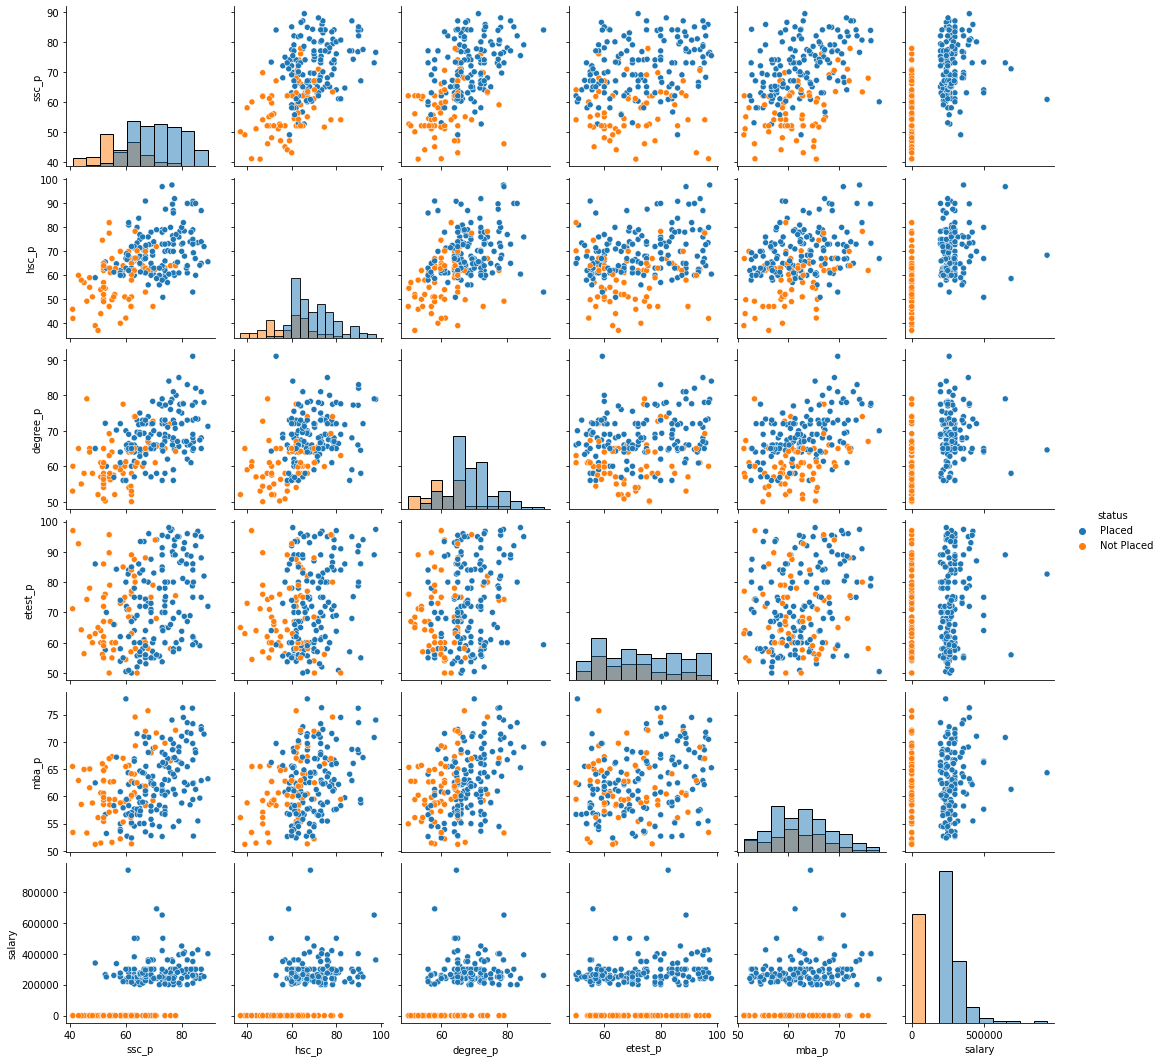

In [ ]:
sns.pairplot(df,hue='status', diag_kind='hist')

**Draw a boxplot for 10th percentage of the students**

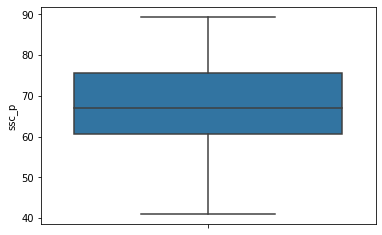

In [ ]:
sns.boxplot(y='ssc_p', data=df)

**Draw a boxplot for 12th percentage of the students**

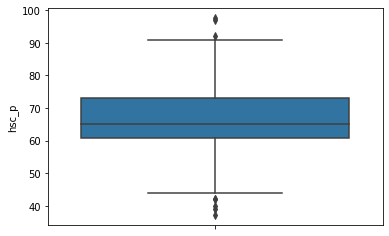

In [ ]:
sns.boxplot(y='hsc_p',data=df)

**Draw a boxplot for 12th percentage of the students for placed and unplaced students**

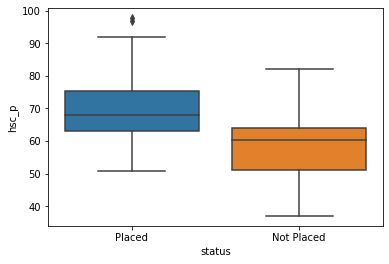

In [ ]:
sns.boxplot(y='hsc_p',data=df, x='status')

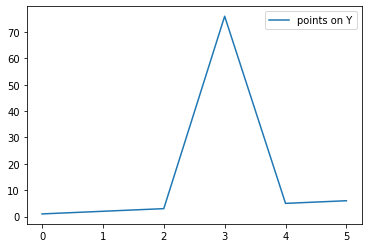

In [ ]:
y=[1,2,3,76,5,6]
plt.plot(y,label="points on Y")
plt.legend()

**Draw lineplot for 10th, 12th, degree and MBA percentage**

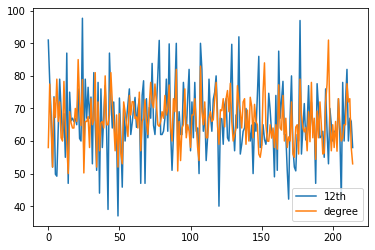

In [ ]:
plt.plot(df['hsc_p'], label="12th")
plt.plot(df['degree_p'], label="degree")
plt.legend()

**Find correlation between continous columns**

In [ ]:
df.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


**Draw heatmap of correlation**

heatmap visualization or heatmap data visualization is a method of graphically representing numerical data where the value of each data point is indicated using colors.

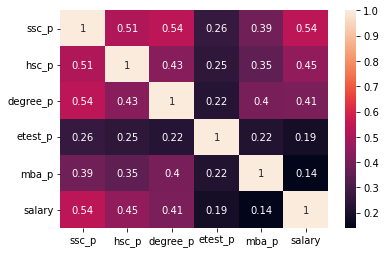

In [ ]:
sns.heatmap(df.corr(), annot=True)

**Draw histogram for salary of students**

(array([67.,  0., 94., 38., 10.,  3.,  1.,  1.,  0.,  1.]),
 array([     0.,  94000., 188000., 282000., 376000., 470000., 564000.,
        658000., 752000., 846000., 940000.]),
 <a list of 10 Patch objects>)

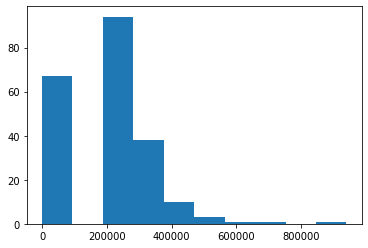

In [ ]:
plt.hist(df['salary'])

**Draw the distribution of 10th Grade percentage**

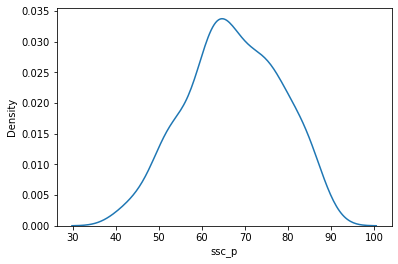

In [ ]:
sns.kdeplot(df['ssc_p'])

In [ ]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

# Outlier Analysis

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


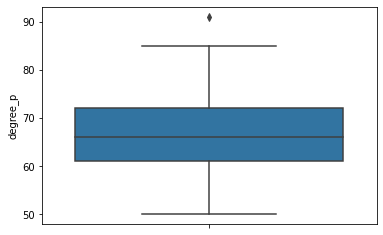

In [ ]:
sns.boxplot(y='degree_p', data=df)

In [ ]:
percentile25=df['degree_p'].quantile(0.25)

In [ ]:
percentile25

61.0

In [ ]:
percentile75=df['degree_p'].quantile(0.75)

In [ ]:
iqr=percentile75-percentile25

In [ ]:
iqr

11.0

In [ ]:
percentile75

72.0

In [ ]:
upper_limit=percentile75+(1.5*iqr)
lower_limit=percentile25-(1.5*iqr)

In [ ]:
upper_limit

88.5

In [ ]:
lower_limit

44.5

In [ ]:
df=df[(df['degree_p']<upper_limit) & (df['degree_p']>lower_limit)]

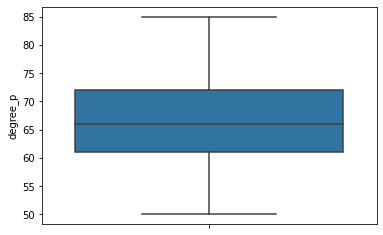

In [ ]:
sns.boxplot(y='degree_p', data=df)

In [ ]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

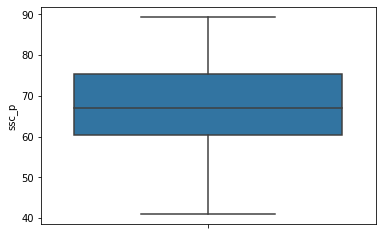

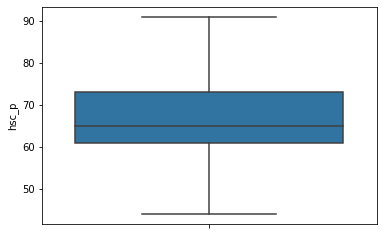

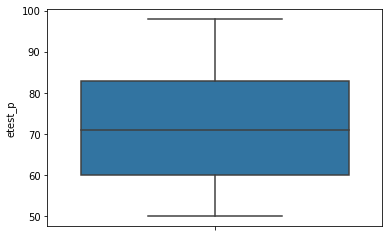

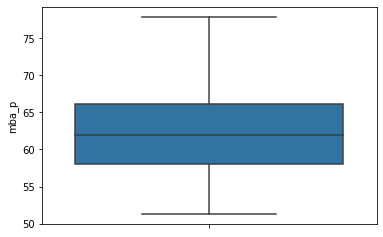

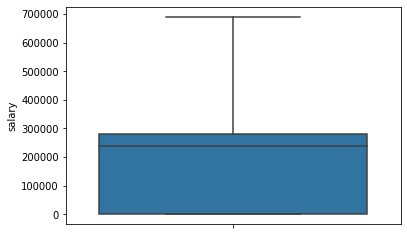

In [ ]:
col=['ssc_p','hsc_p','etest_p','mba_p','salary']
for c in col:
  percentile25=df[c].quantile(0.25)
  percentile75=df[c].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit=percentile75+(1.5*iqr)
  lower_limit=percentile25-(1.5*iqr)
  df=df[(df[c]<upper_limit) & (df[c]>lower_limit)]
  plt.figure()
  sns.boxplot(y=c, data=df)

# Label Encoding

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
5,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df['ssc_b']

1      Central
2      Central
3      Central
4      Central
5       Others
        ...   
210     Others
211     Others
212     Others
213     Others
214    Central
Name: ssc_b, Length: 204, dtype: object

In [ ]:
df['ssc_b']=le.fit_transform(df['ssc_b'])

In [ ]:
df['ssc_b']

1      0
2      0
3      0
4      0
5      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: ssc_b, Length: 204, dtype: int64

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,M,79.33,0,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,0,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,0,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,0,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
5,M,55.00,1,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,1,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,1,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,1,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,1,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [ ]:
col=['gender', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

In [ ]:
for c in col:
  df[c]=le.fit_transform(df[c])

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


# Class 7

**Extract the independent and dependent variables**

In [ ]:
X=df.iloc[:,0:-1].values

In [ ]:
Y=df.iloc[:,-1].values

In [ ]:
X

array([[ 1.  , 79.33,  0.  , ...,  0.  , 66.28,  1.  ],
       [ 1.  , 65.  ,  0.  , ...,  0.  , 57.8 ,  1.  ],
       [ 1.  , 56.  ,  0.  , ...,  1.  , 59.43,  0.  ],
       ...,
       [ 1.  , 67.  ,  1.  , ...,  0.  , 69.72,  1.  ],
       [ 0.  , 74.  ,  1.  , ...,  1.  , 60.23,  1.  ],
       [ 1.  , 62.  ,  0.  , ...,  1.  , 60.22,  0.  ]])

In [ ]:
Y

array([200000., 250000.,      0., 425000.,      0.,      0., 252000.,
       231000.,      0., 260000., 250000.,      0., 218000.,      0.,
       200000., 300000.,      0.,      0., 236000., 265000., 393000.,
       360000., 300000.,      0., 240000., 265000., 350000.,      0.,
       250000.,      0., 278000., 260000.,      0., 300000.,      0.,
       320000., 240000., 411000., 287000.,      0., 300000., 200000.,
            0.,      0., 204000., 250000., 200000.,      0.,      0.,
       450000., 216000., 220000., 240000., 360000., 268000., 265000.,
       260000., 300000., 240000.,      0., 240000.,      0., 275000.,
       275000.,      0., 275000., 360000., 240000., 240000., 218000.,
       336000.,      0., 230000., 500000., 270000.,      0., 240000.,
       300000.,      0., 300000., 300000., 400000., 220000.,      0.,
       210000., 210000., 300000.,      0., 230000.,      0., 260000.,
       420000., 300000.,      0., 220000.,      0.,      0., 380000.,
       300000., 2400

**Split the dataset into training and testing**


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=4)

**Use standardization for feature scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)

In [ ]:
X_train

array([[ 0.73720978, -0.1573603 ,  1.04318517, ...,  1.10397011,
        -0.34694834,  0.63713467],
       [ 0.73720978,  1.07322974,  1.04318517, ..., -0.90582163,
         2.07721603,  0.63713467],
       [-1.356466  , -2.0575361 ,  1.04318517, ..., -0.90582163,
        -1.57280419, -1.56952688],
       ...,
       [ 0.73720978, -0.32023251, -0.95860259, ..., -0.90582163,
        -0.87551259,  0.63713467],
       [ 0.73720978, -0.33832942, -0.95860259, ...,  1.10397011,
        -0.10418756,  0.63713467],
       [ 0.73720978,  1.05513283, -0.95860259, ...,  1.10397011,
         2.38195829,  0.63713467]])

In [ ]:
X_test=sc.transform(X_test)

**Perform Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg=LinearRegression()

In [ ]:
reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
reg.intercept_

205950.70422535218

In [ ]:
reg.coef_

array([ 12077.47765362,  -3680.75604388,   7488.63627876,  -3150.39018673,
        -4138.11422026,    829.58931834, -10402.16677128,  16959.94342756,
        -2524.90891979,   2621.00979368,  -8391.94256016,  14936.63510357,
       133730.9474795 ])

In [ ]:
Y_pred=reg.predict(X_test)

In [ ]:
Y_pred

array([287393.47170154,  11030.9648887 ,  -7269.27785588,  14322.48857512,
       -48636.37982379, 271101.0488875 , 275102.95425715, 284836.65208043,
       262426.10040354, 265942.81292805, -30425.4812277 , 273741.34640675,
       250611.2233083 , 242673.97030419,  -2178.54675718, 271489.22583852,
       265606.89933891, 268021.22071077,  34587.84377886, 294495.46780574,
       339589.9003818 , -12257.06513043, 302184.64372239,   6446.57912654,
         3935.9348417 , 328969.10721125, 267222.08736958,   6342.00059548,
       300763.04196748,  -9281.63835169, 310385.96948223, 310992.35172258,
       324546.76821652, 281830.81781821,  33020.9556046 ,   4731.66661448,
        13294.31356987, 245678.6215048 ,  79784.1667161 , 340334.41681508,
       282874.30101902, 296895.20430413, 294399.72990962, 251595.89219206,
       282595.89612428,  32449.92731024, 277359.71107013,   8118.21618964,
       246618.64089599, 282765.66421537, 286989.4920496 , 291386.61700672,
       314847.38898204, 2

In [ ]:
Y_test

array([250000.,      0.,      0.,      0.,      0., 300000., 250000.,
       300000., 265000., 200000.,      0., 210000., 200000., 300000.,
            0., 218000., 240000., 285000.,      0., 220000., 240000.,
            0., 250000.,      0.,      0., 236000., 230000.,      0.,
       250000.,      0., 210000., 240000., 252000., 260000.,      0.,
            0.,      0., 250000.,      0., 350000., 420000., 300000.,
       350000., 240000., 265000.,      0., 216000.,      0., 250000.,
       350000., 218000., 250000., 300000., 300000.,      0., 265000.,
            0., 290000., 236000.,      0., 250000., 240000.])

**Evaluate the model using MSE, RMSE and R square**

In [ ]:
from sklearn import metrics

In [ ]:
MSE=metrics.mean_squared_error(Y_test, Y_pred)

In [ ]:
RMSE=np.sqrt(MSE)

In [ ]:
RMSE

46398.902007370445

In [ ]:
R2=metrics.r2_score(Y_test,Y_pred)

In [ ]:
R2

0.8715423504368448

# Logistic Regression

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [ ]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0


**Extract the independent and dependent(Status) variables**

In [ ]:
X=df.drop(['status','salary'], axis=1).values

In [ ]:
X

array([[ 1.  , 79.33,  0.  , ..., 86.5 ,  0.  , 66.28],
       [ 1.  , 65.  ,  0.  , ..., 75.  ,  0.  , 57.8 ],
       [ 1.  , 56.  ,  0.  , ..., 66.  ,  1.  , 59.43],
       ...,
       [ 1.  , 67.  ,  1.  , ..., 59.  ,  0.  , 69.72],
       [ 0.  , 74.  ,  1.  , ..., 70.  ,  1.  , 60.23],
       [ 1.  , 62.  ,  0.  , ..., 89.  ,  1.  , 60.22]])

In [ ]:
Y=df['status'].values

In [ ]:
Y

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0])

**Split the dataset into training and testing dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

**Use standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

**Build the Logistic Regression model**

In [ ]:
Y_train

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0])

In [ ]:
Y_test

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier=LogisticRegression()

In [ ]:
classifier.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
Y_pred=classifier.predict(X_test)

In [ ]:
Y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

**Create the confusion matrix and draw a heatmap for it**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[ 8,  2],
       [ 6, 25]])

In [ ]:
tn,fp,fn,tp=confusion_matrix(Y_test, Y_pred).ravel()

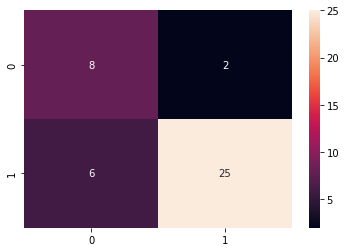

In [ ]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True)

**Find out the accuracy**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8048780487804879

**Find out the auc roc score**

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred)

0.803225806451613

**Find out number of 0 classes in Y_test**

In [ ]:
sum(Y_test==0)

10

**Find out number of 0 classes in Y_test**


In [ ]:
sum(Y_test==1)

31

**Find out the recall and precision**

In [ ]:
r=tp/(tp+fn)

In [ ]:
p=(tp/(tp+fp))

In [ ]:
r

0.8064516129032258

In [ ]:
p

0.9259259259259259

**Create the classification report and understand each term in it**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.93      0.81      0.86        31

    accuracy                           0.80        41
   macro avg       0.75      0.80      0.76        41
weighted avg       0.84      0.80      0.81        41



In [ ]:
f1_score=(2*p*r)/(p+r)

In [ ]:
f1_score

0.8620689655172414

In [ ]:
p_forClass0=(tn/(tn+fn))

In [ ]:
p_forClass0

0.5714285714285714

In [ ]:
r_forClass0=tn/(tn+fp)

In [ ]:
r_forClass0

0.8

In [ ]:
f1_score_for_class0=(2*(p_forClass0)*(r_forClass0))/(r_forClass0+p_forClass0)

In [ ]:
f1_score_for_class0


0.6666666666666666

In [ ]:
(0.57+0.93)/2

0.75

In [ ]:
((0.57*10)+(0.93*31))/41

0.8421951219512196

In [ ]:
Y_pred=(classifier.predict_proba(X_test)[:,1]>=0.7).astype(int)

In [ ]:
classifier.predict_proba(X_test)[:,1]

array([0.88169937, 0.40542639, 0.15054588, 0.92898406, 0.93432257,
       0.79264646, 0.99693337, 0.01714673, 0.94410191, 0.65734503,
       0.98540802, 0.99923234, 0.44112242, 0.01655263, 0.99796399,
       0.13479609, 0.39927997, 0.99810006, 0.38451029, 0.12725059,
       0.05131749, 0.84852235, 0.44356919, 0.64814211, 0.99032292,
       0.07690514, 0.91275787, 0.99970066, 0.99605305, 0.41605873,
       0.92778982, 0.99795543, 0.44519086, 0.98414903, 0.89705907,
       0.93986228, 0.95986641, 0.99529287, 0.96012035, 0.53903405,
       0.8589995 ])

In [ ]:
classifier.predict_proba(X_test)[:,1]

array([0.88169937, 0.40542639, 0.15054588, 0.92898406, 0.93432257,
       0.79264646, 0.99693337, 0.01714673, 0.94410191, 0.65734503,
       0.98540802, 0.99923234, 0.44112242, 0.01655263, 0.99796399,
       0.13479609, 0.39927997, 0.99810006, 0.38451029, 0.12725059,
       0.05131749, 0.84852235, 0.44356919, 0.64814211, 0.99032292,
       0.07690514, 0.91275787, 0.99970066, 0.99605305, 0.41605873,
       0.92778982, 0.99795543, 0.44519086, 0.98414903, 0.89705907,
       0.93986228, 0.95986641, 0.99529287, 0.96012035, 0.53903405,
       0.8589995 ])

# Decision Tree

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [ ]:
X=df.drop(['status','salary'], axis=1).values

In [ ]:
X

array([[ 1.  , 79.33,  0.  , ..., 86.5 ,  0.  , 66.28],
       [ 1.  , 65.  ,  0.  , ..., 75.  ,  0.  , 57.8 ],
       [ 1.  , 56.  ,  0.  , ..., 66.  ,  1.  , 59.43],
       ...,
       [ 1.  , 67.  ,  1.  , ..., 59.  ,  0.  , 69.72],
       [ 0.  , 74.  ,  1.  , ..., 70.  ,  1.  , 60.23],
       [ 1.  , 62.  ,  0.  , ..., 89.  ,  1.  , 60.22]])

In [ ]:
Y=df['status'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.35, random_state=10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()

In [ ]:
dc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred=dc.predict(X_test)

In [ ]:
confusion_matrix(Y_test, Y_pred)

array([[14,  9],
       [ 6, 43]])

In [ ]:
accuracy_score(Y_test, Y_pred)

0.7916666666666666

In [ ]:
Y_pred_train=dc.predict(X_train)

In [ ]:
accuracy_score(Y_train, Y_pred_train)

1.0

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.61      0.65        23
           1       0.83      0.88      0.85        49

    accuracy                           0.79        72
   macro avg       0.76      0.74      0.75        72
weighted avg       0.79      0.79      0.79        72



In [ ]:
from sklearn import tree

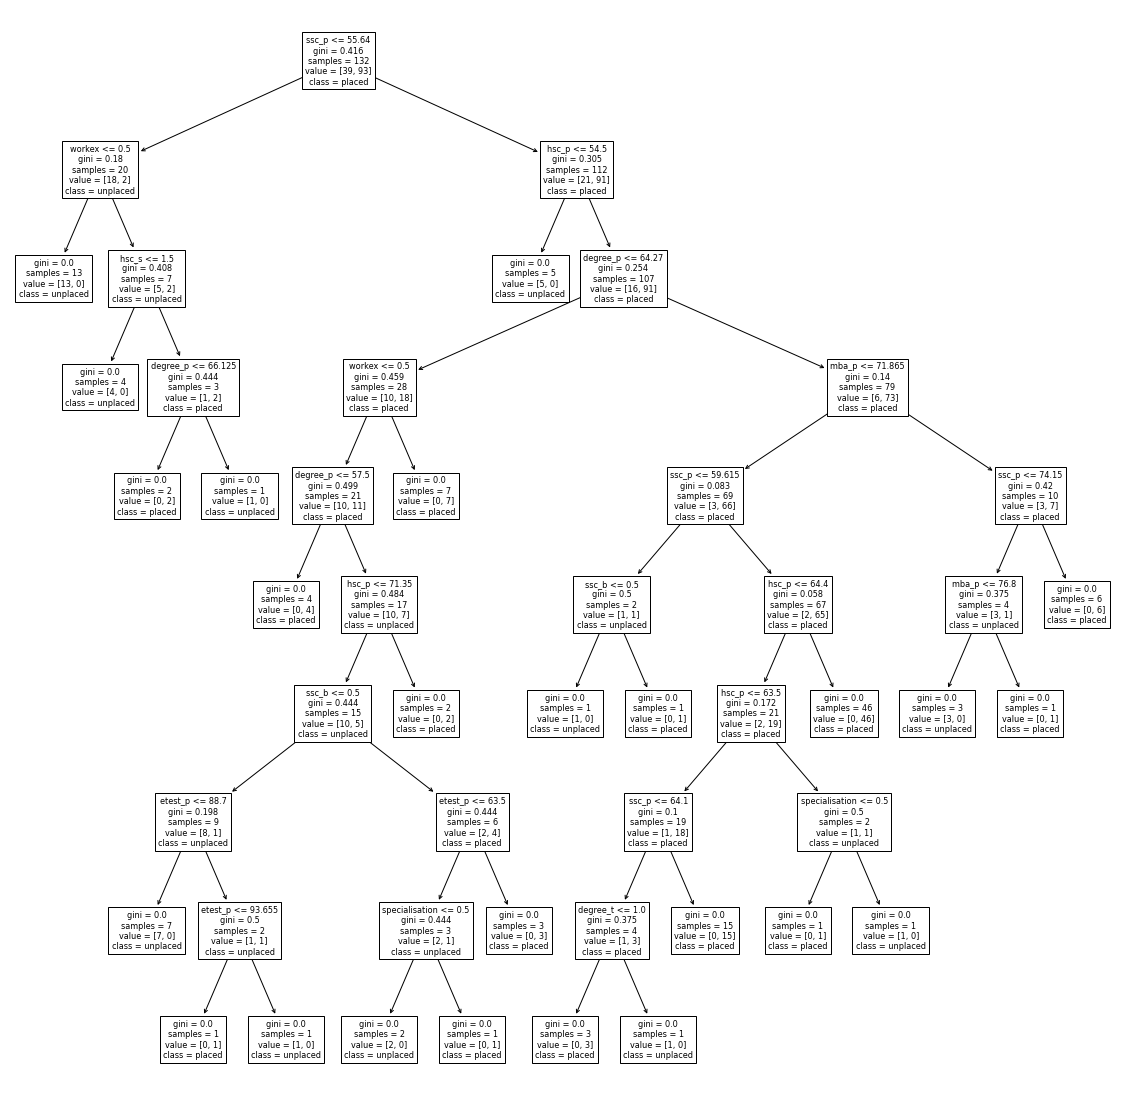

In [ ]:
plt.figure(figsize=(20,20))
tree.plot_tree(dc, feature_names=df.columns[:-2], class_names=['unplaced','placed'])
plt.show()

In [ ]:
df.columns[:-2]

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p'],
      dtype='object')

In [ ]:
df.head(1)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0


# Random Forest

In [ ]:
n_estimators=[10,20,30,40,50,60,70,80,90,100,150]

In [ ]:
max_features=['sqrt', 'log2']

In [ ]:
max_depth=np.linspace(10,120,10 ,dtype=int)

In [ ]:
np.linspace(10,120, 10)

array([ 10.        ,  22.22222222,  34.44444444,  46.66666667,
        58.88888889,  71.11111111,  83.33333333,  95.55555556,
       107.77777778, 120.        ])

In [ ]:
[int(x) for x in np.linspace(10,120, 10)]

[10, 22, 34, 46, 58, 71, 83, 95, 107, 120]

In [ ]:
np.linspace(10,120,10 ,dtype=int)


array([ 10,  22,  34,  46,  58,  71,  83,  95, 107, 120])

In [ ]:
criterion=["gini", "entropy"]

In [ ]:
min_samples_split=[2,4,6,8,10,12,14,16,18,20]

In [ ]:
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'criterion':criterion,
             'min_samples_split':min_samples_split}

# Clustering

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
new_df=df

In [ ]:
wc=[]
for i in range(1,11):
  km=KMeans()

In [ ]:
kmeans=KMeans(3)

In [ ]:
kmeans.fit(new_df)

KMeans(n_clusters=3)

In [ ]:
kmeans.predict(new_df)

array([1, 1, 0, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 2,
       1, 0, 1, 1, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       2, 1, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 2, 1, 1, 1, 0], dtype=int32)

In [ ]:
new_df["clusters"]=kmeans.predict(new_df)

In [ ]:
new_df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,clusters
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0,2
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0,2
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0,1
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0,1
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0,1


In [ ]:
kmeans.inertia_

252199482354.73566

HW: Do feature scaling and then build the clustering model.

In [ ]:
new_df.reset_index(inplace=True)

In [ ]:
df

,index,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,clusters
0,1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,1
1,2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0,1
2,3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0,0
3,4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0,2
4,5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0,2
200,211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0,1
201,212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0,1
202,213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0,1


**Use elbow method to find the optimal number of clusters**

In [ ]:
new_df

,index,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,clusters
0,1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,1
1,2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0,1
2,3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0,0
3,4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0,2
4,5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0,2
200,211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0,1
201,212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0,1
202,213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0,1


In [ ]:
for i in range(1,205):
  print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204


In [ ]:
df.drop('clusters', axis=1, inplace=True)

In [ ]:
df

,index,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
1,2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
2,3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
3,4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
4,5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
200,211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
201,212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
202,213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [ ]:
inertia_list=[]
for i in range(1,10):
  kmeans=KMeans(i)
  kmeans.fit(df)
  inertia_list.append(kmeans.inertia_)
  print(inertia_list)

[4137281628114.2773]
[4137281628114.2773, 714354071452.3313]
[4137281628114.2773, 714354071452.3313, 252200255342.08252]
[4137281628114.2773, 714354071452.3313, 252200255342.08252, 152981725676.06042]
[4137281628114.2773, 714354071452.3313, 252200255342.08252, 152981725676.06042, 80540449526.58499]
[4137281628114.2773, 714354071452.3313, 252200255342.08252, 152981725676.06042, 80540449526.58499, 50577184664.627106]
[4137281628114.2773, 714354071452.3313, 252200255342.08252, 152981725676.06042, 80540449526.58499, 50577184664.627106, 29328575623.156357]
[4137281628114.2773, 714354071452.3313, 252200255342.08252, 152981725676.06042, 80540449526.58499, 50577184664.627106, 29328575623.156357, 17101846357.683708]
[4137281628114.2773, 714354071452.3313, 252200255342.08252, 152981725676.06042, 80540449526.58499, 50577184664.627106, 29328575623.156357, 17101846357.683708, 9640094928.456635]


In [ ]:
inertia_list

[4137281628114.2773,
 714354071452.3313,
 252200255342.08252,
 152981725676.06042,
 80540449526.58499,
 50577184664.627106,
 29328575623.156357,
 17101846357.683708,
 9640094928.456635]

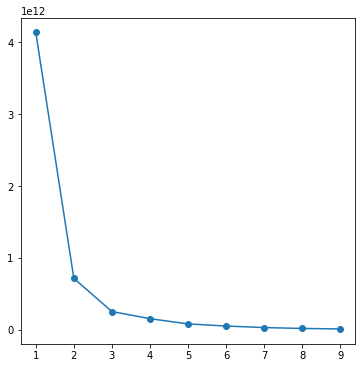

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(range(1,10),inertia_list,marker="o")

In [ ]:
df.head()

,index,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
1,2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
2,3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
3,4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
4,5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0


#PCA